# Feed Forward Neural Network on Fashion MNIST
---
Don't forget to use **https://pytorch.org/docs/stable/**

In [78]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import torch

## Prepare Fashion MNIST dataset

In [80]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Compose
from torch.utils.data import DataLoader

In [131]:
class ReshapeTransform:
    def __init__(self, new_size=(-1,)):
        self.new_size = new_size

    def __call__(self, sample):
        return torch.reshape(sample, self.new_size)

In [133]:
transformations = Compose([ToTensor(), ReshapeTransform()])

In [134]:
train_dataset = FashionMNIST('fm_data/', download=True, train=True, transform=transformations, target_transform=None)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = FashionMNIST('fm_data/', download=True, train=False, transform=transformations, target_transform=None)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [291]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

In [137]:
next(iter(train_loader))

[tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.2745, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]),
 tensor([7, 5, 0, 9, 4, 3, 0, 9, 9, 8, 2, 0, 6, 1, 7, 4, 2, 8, 8, 2, 5, 6, 8, 2,
         2, 1, 6, 4, 5, 9, 1, 5, 2, 7, 9, 1, 7, 8, 4, 4, 7, 8, 9, 7, 4, 4, 2, 8,
         5, 0, 5, 5, 7, 9, 4, 6, 3, 8, 0, 4, 7, 0, 5, 6])]

## Define neural network, optimizers and loss function

In [86]:
from torch.nn import Module
from torch.nn import ReLU, Tanh, Dropout, Softmax, Linear, BatchNorm1d
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim import Adam, SGD
from torch.nn.init import xavier_uniform_, normal_

In [172]:
class FeedForwardNeuralNet(torch.nn.Module):
    def __init__(self):
        super(FeedForwardNeuralNet, self).__init__()
        
        self.layer_1 = Linear(784, 64)
        self.layer_2 = Linear(64, 10)
        xavier_uniform_(self.layer_1.weight)
        
        self.batch_norm_layer_1 = BatchNorm1d(64)
        self.dropout = Dropout(p=0.1)

        
    def forward(self, input_batch):
        prediction = self.layer_1(input_batch)
        prediction = torch.relu(prediction)
        prediction = self.batch_norm_layer_1(prediction)
        prediction = self.dropout(prediction)
        prediction = self.layer_2(prediction)
        return torch.softmax(prediction, dim=1)
        # return torch.log_softmax(prediction, dim=1) -> torch.exp(prediction)

In [173]:
feed_forward_neural_net = FeedForwardNeuralNet()

In [174]:
feed_forward_neural_net

FeedForwardNeuralNet(
  (layer_1): Linear(in_features=784, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=10, bias=True)
  (batch_norm_layer_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1)
)

In [ ]:
images, labels = next(iter(test_loader))

In [285]:
predictions = feed_forward_neural_net(images)
predictions[:4]

tensor([[1.6994e-05, 9.9993e-01, 1.2824e-07, 7.8322e-06, 3.9035e-05, 8.1290e-08,
         3.8154e-08, 5.3048e-07, 3.8982e-07, 1.7144e-06],
        [6.7080e-09, 3.3725e-08, 7.7035e-08, 1.3488e-07, 4.1655e-09, 9.9999e-01,
         1.6805e-08, 5.2264e-07, 7.9141e-06, 4.4072e-06],
        [1.2716e-07, 3.2982e-07, 5.5845e-08, 1.7965e-07, 4.5868e-08, 2.9825e-07,
         6.7935e-09, 9.9996e-01, 9.7322e-06, 2.7751e-05],
        [2.1321e-03, 4.3852e-05, 9.2587e-01, 1.3686e-03, 2.2909e-02, 2.2357e-04,
         3.0274e-02, 2.9680e-04, 1.6830e-02, 4.9551e-05]],
       grad_fn=<SliceBackward>)

In [287]:
loss_fce = CrossEntropyLoss()

In [288]:
loss_fce(predictions, labels)

tensor(1.5926, grad_fn=<NllLossBackward>)

In [176]:
#optimizer = SGD(feed_forward_neural_net.parameters(), lr=0.1)
optimizer = Adam(feed_forward_neural_net.parameters())

## Train neural net

In [177]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def validation(feed_forward_neural_net, loss_fce, test_loader):
    accuracy = 0
    loss = 0
    
    feed_forward_neural_net.eval()
    for images, labels in test_loader:
        predictions = feed_forward_neural_net(images)
        
        accuracy += (predictions.argmax(dim=1) == labels).type(torch.FloatTensor).mean().item() 
        loss += loss_fce(predictions, labels).item()
        
    return accuracy / len(test_loader) * 100, loss / len(test_loader)

In [179]:
validation(feed_forward_neural_net, loss_fce, test_loader)

(11.415207006369426, 2.303013657308688)

In [163]:
# Initial params setup
epochs = 2
batch_iteration = 0
report_period = 100

train_leak_loss = deque(maxlen=report_period)
train_loss_history = []
test_loss_history = []
test_acc_history = []

In [180]:
for epoch in range(epochs):
    
    # Setup net to train mode and go through one epoch.
    feed_forward_neural_net.train()
    for images, labels in train_loader:
        batch_iteration += 1
        
        # Training net on one batch.
        optimizer.zero_grad()
        predictions = feed_forward_neural_net.forward(images)
        loss = loss_fce(predictions, labels)
        loss.backward()
        optimizer.step()
        
        # Save batch loss.
        train_leak_loss.append(loss.item())
        # In case we should report, lets make validation on test set.
        if batch_iteration % report_period == 0:
            feed_forward_neural_net.eval()
            # We don't want to collect info for gradients from here.
            with torch.no_grad():
                test_accuracy, test_loss = validation(feed_forward_neural_net, loss_fce, test_loader)
                
            print(f'Epoch: {epoch+1}/{epochs}.. ',
                  f"Train Loss: {round(np.mean(train_leak_loss), 2)}.. ",
                  f"Test Loss: {round(test_loss, 2)}.. ",
                  f"Test Acc: {round(test_accuracy, 2)}%")
            
            train_loss_history.append(np.mean(train_leak_loss))
            test_loss_history.append(test_loss)
            test_acc_history.append(test_accuracy)
                        
            feed_forward_neural_net.train()

Epoch: 1/2..  Train Loss: 1.77..  Test Loss: 2.11..  Test Acc: 61.3%
Epoch: 1/2..  Train Loss: 1.9..  Test Loss: 1.79..  Test Acc: 75.99%
Epoch: 1/2..  Train Loss: 1.74..  Test Loss: 1.72..  Test Acc: 78.46%
Epoch: 1/2..  Train Loss: 1.69..  Test Loss: 1.69..  Test Acc: 80.03%
Epoch: 1/2..  Train Loss: 1.67..  Test Loss: 1.67..  Test Acc: 81.98%
Epoch: 1/2..  Train Loss: 1.65..  Test Loss: 1.65..  Test Acc: 82.18%
Epoch: 1/2..  Train Loss: 1.65..  Test Loss: 1.65..  Test Acc: 83.22%
Epoch: 1/2..  Train Loss: 1.64..  Test Loss: 1.64..  Test Acc: 83.06%
Epoch: 1/2..  Train Loss: 1.63..  Test Loss: 1.64..  Test Acc: 83.88%
Epoch: 1/2..  Train Loss: 1.63..  Test Loss: 1.64..  Test Acc: 83.83%
Epoch: 2/2..  Train Loss: 1.63..  Test Loss: 1.64..  Test Acc: 83.88%
Epoch: 2/2..  Train Loss: 1.62..  Test Loss: 1.63..  Test Acc: 83.81%
Epoch: 2/2..  Train Loss: 1.62..  Test Loss: 1.64..  Test Acc: 83.57%
Epoch: 2/2..  Train Loss: 1.62..  Test Loss: 1.64..  Test Acc: 82.97%
Epoch: 2/2..  Train Lo

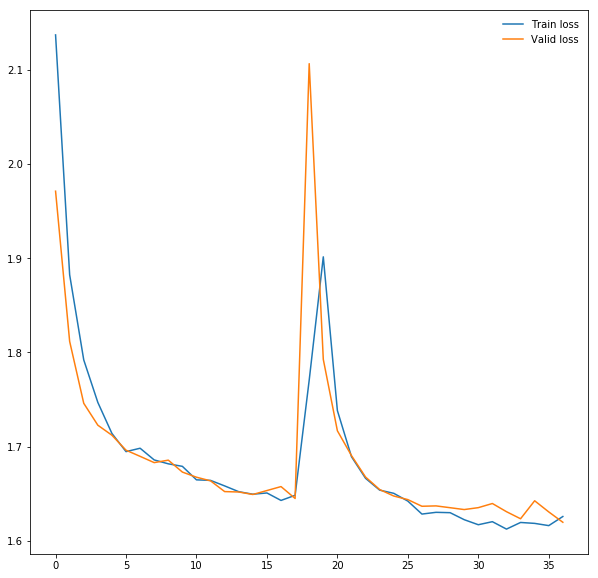

In [223]:
fig = plt.figure(figsize=(10, 10))
plt.plot(train_loss_history, label='Train loss')
plt.plot(test_loss_history, label='Valid loss')
plt.legend(frameon=False)

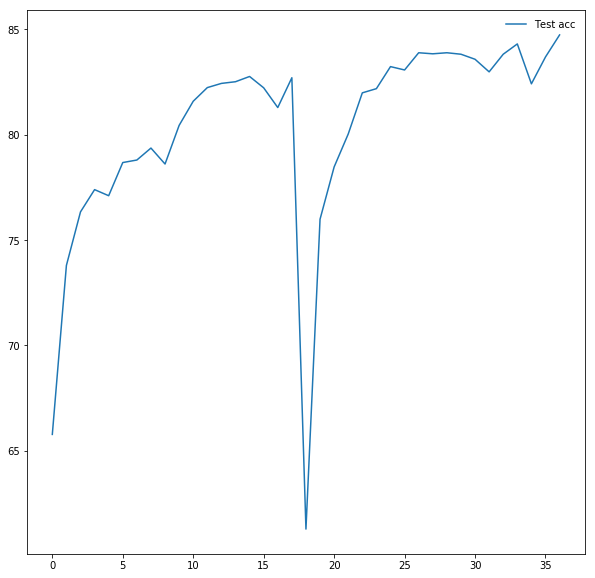

In [265]:
fig = plt.figure(figsize=(10, 10))
plt.plot(test_acc_history, label='Test acc')
plt.legend(frameon=False)

## Results evaluation

In [220]:
from image_processing_workshop.visual import plot_classify, plot_image

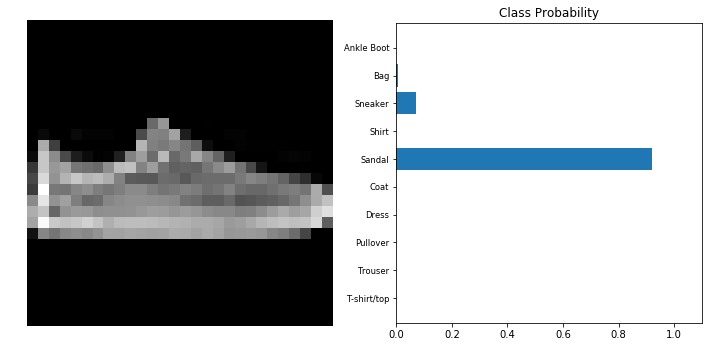

In [222]:
plot_classify(test_dataset[12][0], feed_forward_neural_net)

### Load reuslts to pandas df

In [256]:
from image_processing_workshop.eval import get_results_df
from image_processing_workshop.visual import plot_df_examples

In [257]:
df = get_results_df(feed_forward_neural_net, test_loader)
df.head(10)

,label_class_name,label_class_score,predicted_class_name_top1,predicted_class_score_top1,image
0,T-shirt/top,0.995957,T-shirt/top,0.995957,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10..."
1,Pullover,0.981731,Pullover,0.981731,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007843137718..."
2,Ankle boot,0.898002,Ankle boot,0.898002,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Trouser,0.999986,Trouser,0.999986,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Dress,0.999997,Dress,0.999997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,Sandal,1.000000,Sandal,1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,Coat,0.999948,Coat,0.999948,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,T-shirt/top,0.992675,T-shirt/top,0.992675,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856..."
8,Coat,0.999270,Coat,0.999270,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007843137718..."
9,T-shirt/top,0.954461,T-shirt/top,0.954461,"[[0.0, 0.0, 0.0, 0.0, 0.003921568859368563, 0...."


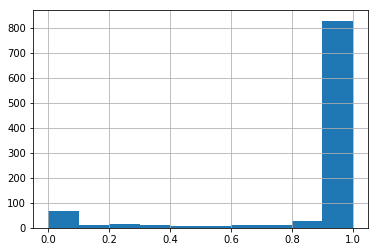

In [258]:
df[df.label_class_name=='Dress'].label_class_score.hist()

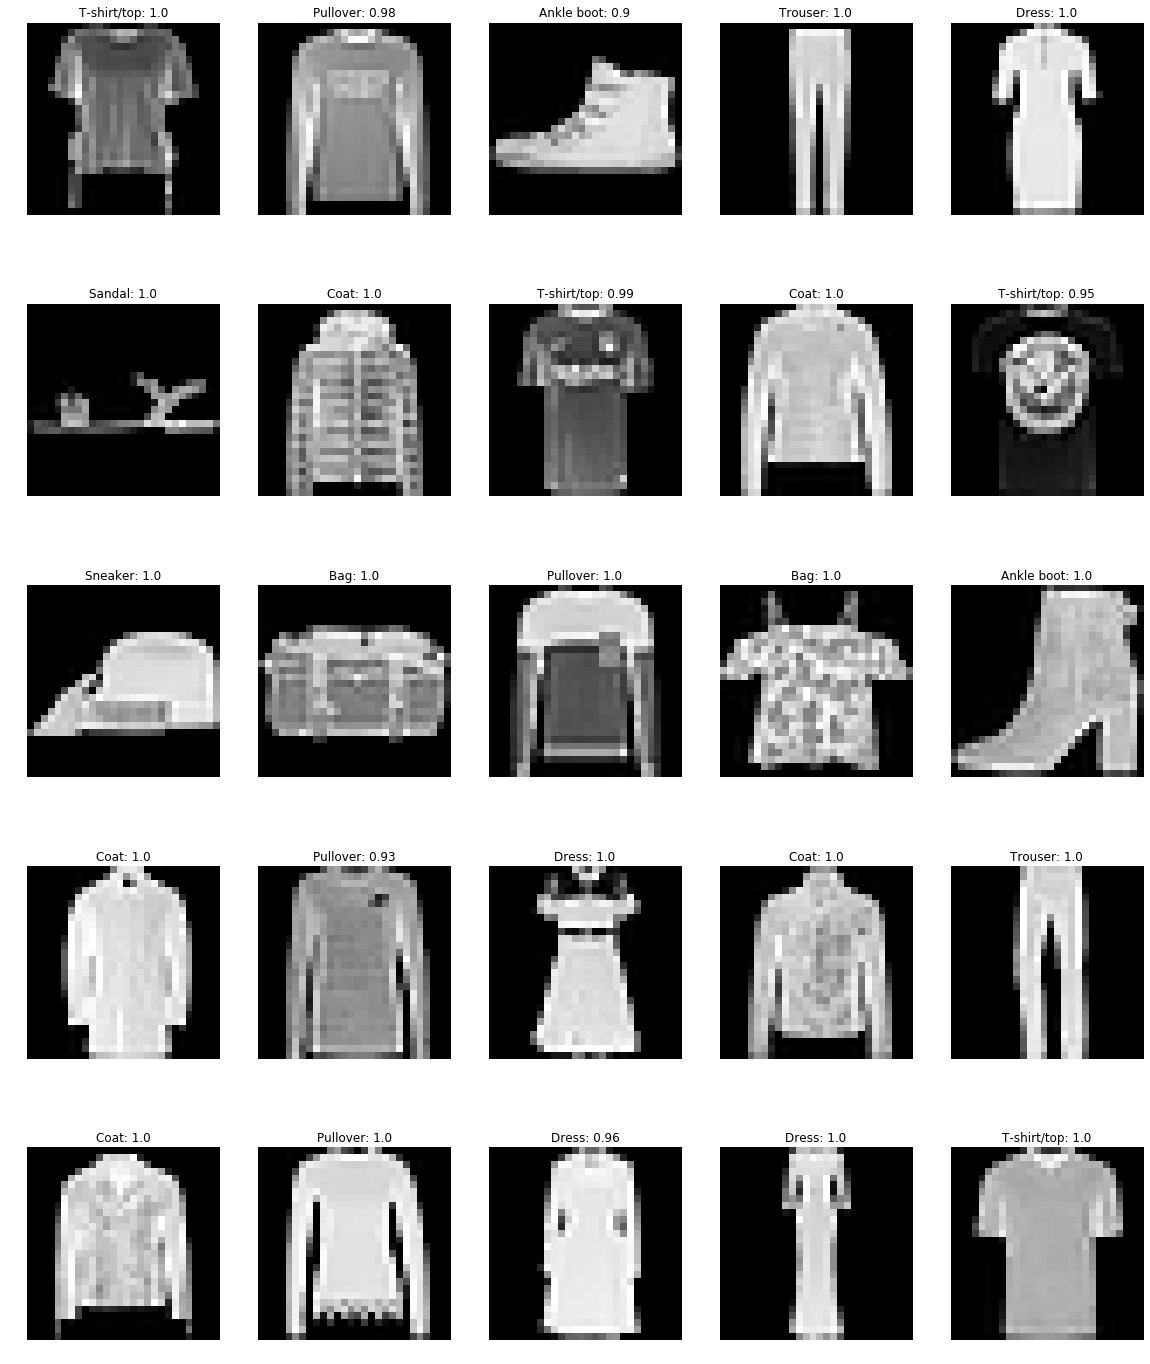

In [259]:
plot_df_examples(df.iloc[:25])

### Precision

In [263]:
from image_processing_workshop.eval import get_precision

In [264]:
get_precision(df, 'Dress')

80.94

### Recall

In [266]:
from image_processing_workshop.eval import get_recall

In [267]:
get_recall(df, 'Dress')

89.2

### Overall Recall and Precision

In [268]:
from image_processing_workshop.eval import get_rec_prec

In [269]:
get_rec_prec(df)

,class_name,recall,precision
0,T-shirt/top,84.0,78.73
1,Trouser,95.2,98.55
2,Pullover,78.5,73.02
3,Dress,89.2,80.94
4,Coat,72.9,75.94
5,Sandal,91.2,95.30
6,Shirt,55.5,68.52
7,Sneaker,96.2,87.69
8,Bag,96.3,94.32
9,Ankle boot,91.5,96.83


### Accuracy

In [270]:
from image_processing_workshop.eval import get_accuracy

In [271]:
get_accuracy(df)

85.05

### False Positives

In [272]:
from image_processing_workshop.eval import get_false_positives

In [273]:
fp = get_false_positives(df, label_class_name='Shirt')

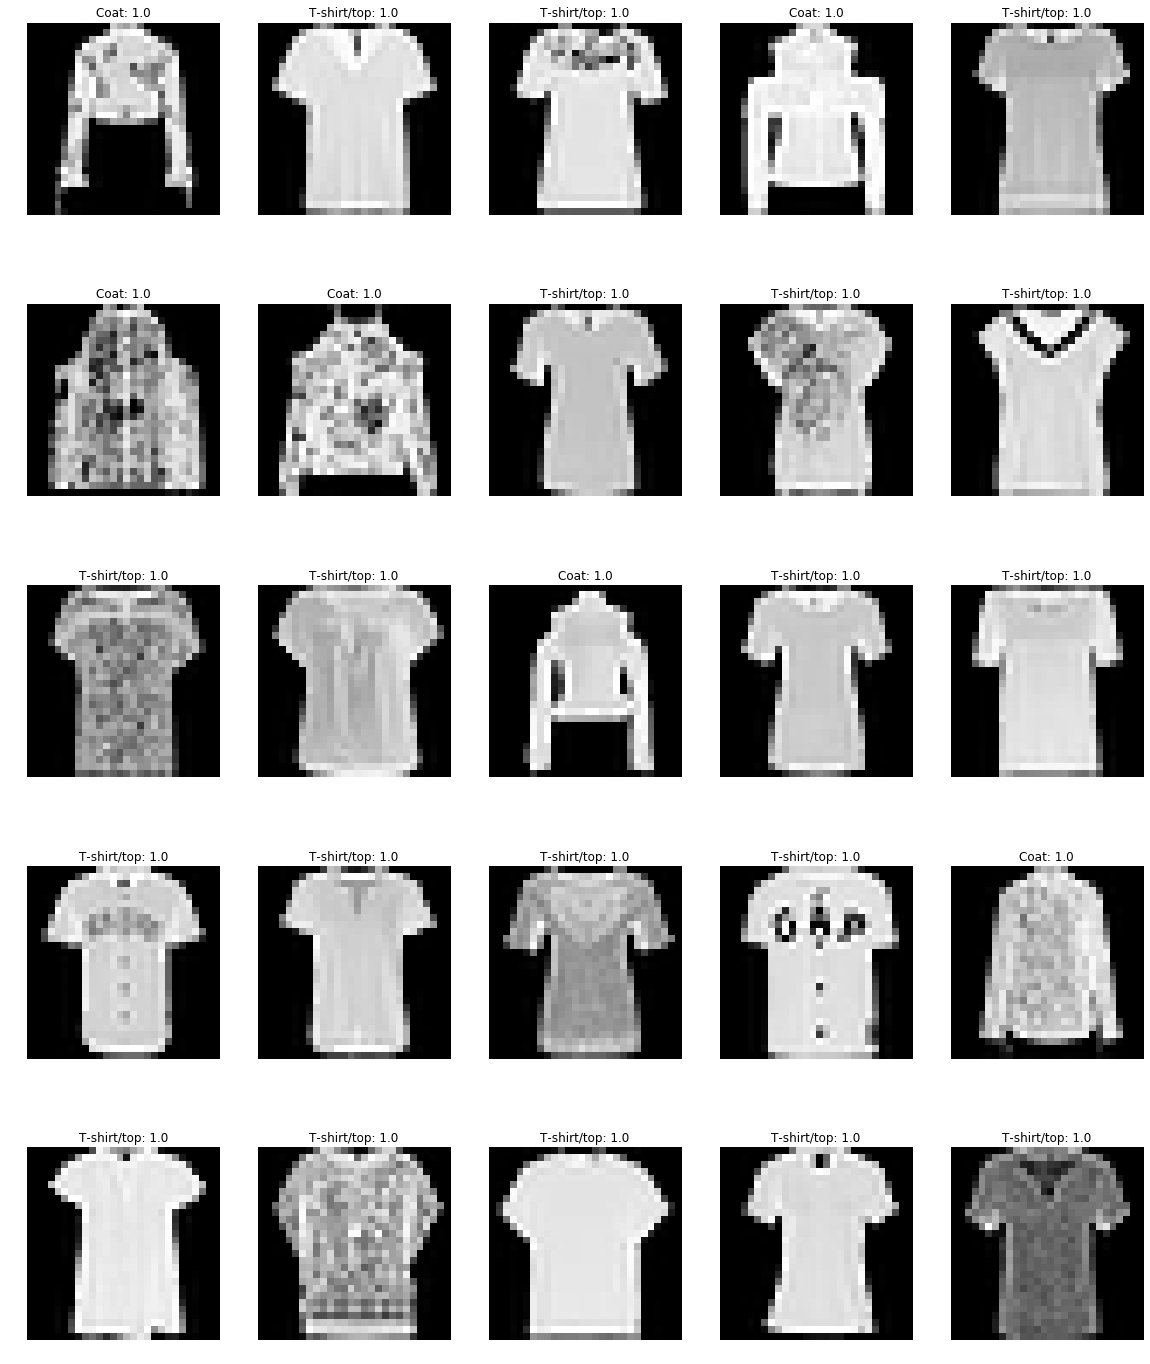

In [275]:
plot_df_examples(fp)

In [276]:
fp = get_false_positives(df, label_class_name='Shirt', predicted_class_name='Pullover')

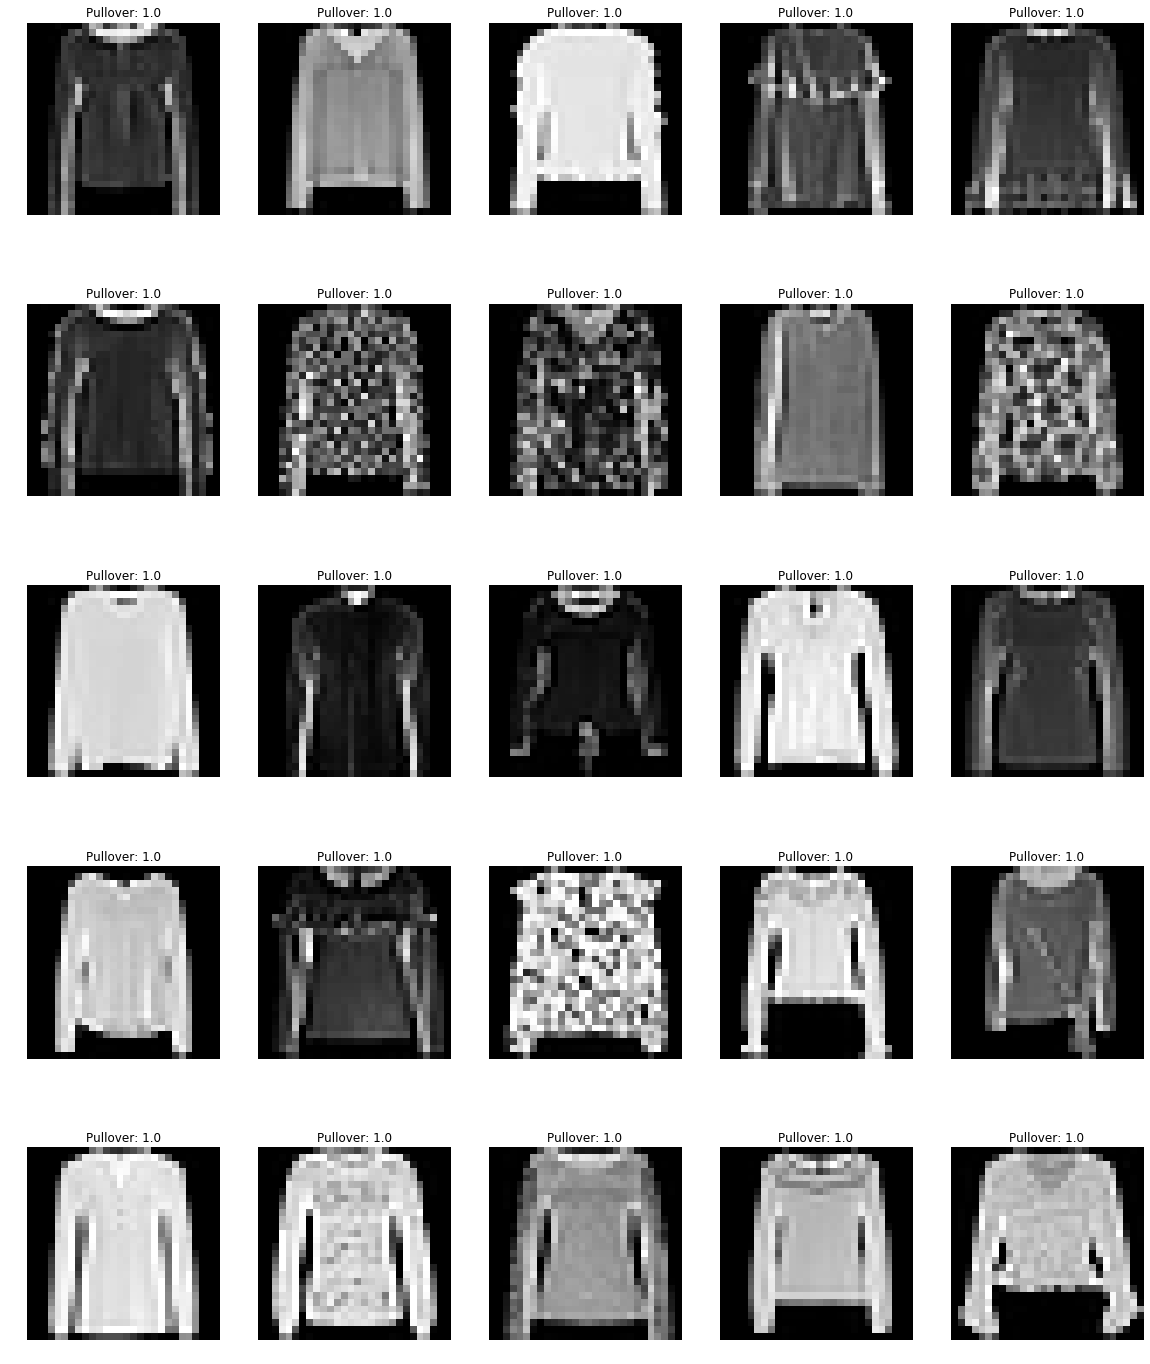

In [278]:
plot_df_examples(fp)

### Confusion Matrix

In [280]:
from image_processing_workshop.visual import plot_coocurance_matrix

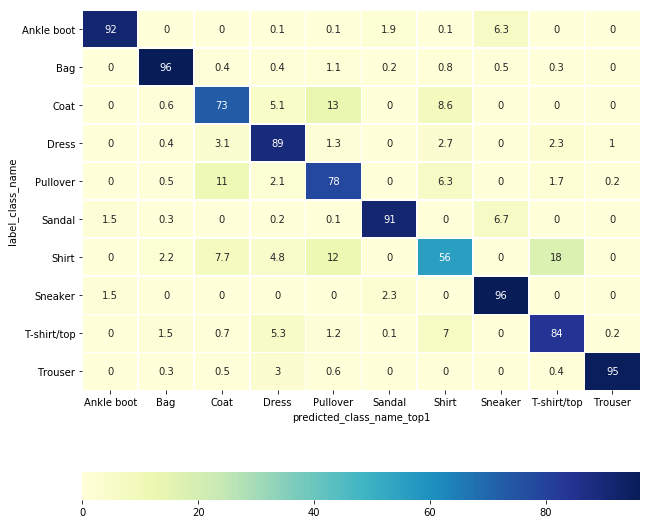

In [281]:
plot_coocurance_matrix(df, use_log=False)